## Customer Segmentation for a Specific Retail Brand
---------

This project aims to perform customer segmentation for a retail brand based on their purchase behavior. Leveraging techniques such as clustering, unsupervised learning, and RFM (Recency, Frequency, Monetary) analysis, we will group customers into distinct segments to facilitate targeted marketing strategies. The analysis will be performed using the Online Retail Dataset, a publicly available dataset containing transactional data. A key part of this project will involve visualizing the identified customer segments and providing recommendations for tailored offers to each segment, ultimately aiming to enhance customer engagement and drive sales.

# Dataset Used
* * *
The dataset used for this project is the **Online Retail Dataset**, available from the UCI Machine Learning Repository. This dataset contains transactional data from a UK-based online retail store, covering a period from 01/12/2010 to 09/12/2011.

The dataset includes the following features:

*   **InvoiceNo**: Invoice number. A unique number assigned to each transaction.
*   **StockCode**: Stock code. A unique number assigned to each distinct product.
*   **Description**: Product description.
*   **Quantity**: The quantity of each product in a transaction.
*   **InvoiceDate**: Invoice date and time. The date and time when each transaction was generated.
*   **UnitPrice**: Unit price. The product price per unit.
*   **CustomerID**: Customer number. A unique number assigned to each customer.
*   **Country**: Country. The country where each customer resides.

#Importing libraries

In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CustomerSegmentationProject/online_retail.csv')

#Exploratory Data Analysis

In [ ]:
df.rename(columns={'Customer ID': 'CustomerID', 'Invoice':'InvoiceNo', 'Price':'UnitPrice'}, inplace=True)

In [ ]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/2009 7:45,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,12/1/2009 7:46,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/2009 7:46,3.75,13085.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   InvoiceNo    1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   UnitPrice    1048575 non-null  float64
 6   CustomerID   811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [ ]:
missing_cols = df.isna().sum()
for col, count in missing_cols.items():
    if count > 0:
        print(f"Column '{col}' has {count} missing rows")

Column 'Description' has 4372 missing rows
Column 'CustomerID' has 236682 missing rows


We found that we have a big number of null customer id, since this is a curcial feature for our case we are going to check if it is possible to find out the customer id based on some other features

### Nulls in CustomerID

In [ ]:
#first we find the indices of rows with missing CustomerID
missing_customer_id_indices = df[df['CustomerID'].isnull()].index

#then we display rows around a few instances of missing CustomerID

for i, index in enumerate(missing_customer_id_indices):
    if i >= 10:
        break

    print(f"\nRows around index {index} with missing CustomerID:")
    start_index = max(0, index - 2)
    end_index = min(len(df) - 1, index + 2)

    display(df.iloc[start_index:end_index + 1])


Rows around index 263 with missing CustomerID:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
261,489462,90209A,PURPLE ENAMEL+GLASS HAIR COMB,3,12/1/2009 10:49,2.10,17592.0,United Kingdom
262,489462,90082D,DIAMANTE BOW BROOCH BLACK COLOUR,2,12/1/2009 10:49,6.35,17592.0,United Kingdom
263,489464,21733,85123a mixed,-96,12/1/2009 10:52,0.00,NaN,United Kingdom
264,489465,21707,"FOLDING UMBRELLA , BLACK/BLUE SPOT",12,12/1/2009 10:52,4.95,13767.0,United Kingdom
265,489465,21710,FOLDING UMBRELLA PINK/WHITE SPOT,12,12/1/2009 10:52,4.95,13767.0,United Kingdom



Rows around index 283 with missing CustomerID:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
281,489465,72760B,VINTAGE CREAM 3 BASKET CAKE STAND,4,12/1/2009 10:52,9.95,13767.0,United Kingdom
282,489465,84879,ASSORTED COLOUR BIRD ORNAMENT,160,12/1/2009 10:52,1.45,13767.0,United Kingdom
283,489463,71477,short,-240,12/1/2009 10:52,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,12/1/2009 10:53,0.00,NaN,United Kingdom
285,C489476,22149,FELTCRAFT 6 FLOWER FRIENDS,-6,12/1/2009 10:55,2.10,13293.0,United Kingdom



Rows around index 284 with missing CustomerID:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
282,489465,84879,ASSORTED COLOUR BIRD ORNAMENT,160,12/1/2009 10:52,1.45,13767.0,United Kingdom
283,489463,71477,short,-240,12/1/2009 10:52,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,12/1/2009 10:53,0.00,NaN,United Kingdom
285,C489476,22149,FELTCRAFT 6 FLOWER FRIENDS,-6,12/1/2009 10:55,2.10,13293.0,United Kingdom
286,489488,84031B,CHARLIE LOLA BLUE HOT WATER BOTTLE,1,12/1/2009 10:59,4.65,17238.0,United Kingdom



Rows around index 470 with missing CustomerID:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
468,489520,84836,ZINC METAL HEART DECORATION,12,12/1/2009 11:41,1.25,14911.0,EIRE
469,489520,22122,SET OF 2 FANCY FONT TEA TOWELS,12,12/1/2009 11:41,2.95,14911.0,EIRE
470,489521,21646,NaN,-50,12/1/2009 11:44,0.00,NaN,United Kingdom
471,489522,21916,SET 12 RETRO WHITE CHALK STICKS,3,12/1/2009 11:45,0.42,15998.0,United Kingdom
472,489522,72760B,VINTAGE CREAM 3 BASKET CAKE STAND,1,12/1/2009 11:45,9.95,15998.0,United Kingdom



Rows around index 577 with missing CustomerID:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
575,489523,84879,ASSORTED COLOUR BIRD ORNAMENT,800,12/1/2009 11:46,1.45,12931.0,United Kingdom
576,C489524,21258,VICTORIAN SEWING BOX LARGE,-1,12/1/2009 11:48,12.75,15614.0,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,12/1/2009 11:49,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,12/1/2009 11:49,0.85,NaN,United Kingdom
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,12/1/2009 11:50,1.25,12533.0,Germany



Rows around index 578 with missing CustomerID:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
576,C489524,21258,VICTORIAN SEWING BOX LARGE,-1,12/1/2009 11:48,12.75,15614.0,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,12/1/2009 11:49,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,12/1/2009 11:49,0.85,NaN,United Kingdom
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,12/1/2009 11:50,1.25,12533.0,Germany
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,12/1/2009 11:50,0.55,12533.0,Germany



Rows around index 1055 with missing CustomerID:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1053,489546,22196,SMALL HEART MEASURING SPOONS,12,12/1/2009 12:30,0.85,14156.0,EIRE
1054,489546,22199,FRYING PAN RED POLKADOT,4,12/1/2009 12:30,4.25,14156.0,EIRE
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,12/1/2009 12:32,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,12/1/2009 12:32,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,12/1/2009 12:32,2.95,NaN,United Kingdom



Rows around index 1056 with missing CustomerID:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1054,489546,22199,FRYING PAN RED POLKADOT,4,12/1/2009 12:30,4.25,14156.0,EIRE
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,12/1/2009 12:32,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,12/1/2009 12:32,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,12/1/2009 12:32,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,12/1/2009 12:32,1.65,NaN,United Kingdom



Rows around index 1057 with missing CustomerID:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,12/1/2009 12:32,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,12/1/2009 12:32,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,12/1/2009 12:32,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,12/1/2009 12:32,1.65,NaN,United Kingdom
1059,489548,22131,FOOD CONTAINER SET 3 LOVE HEART,2,12/1/2009 12:32,1.95,NaN,United Kingdom



Rows around index 1058 with missing CustomerID:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1056,489548,22254,FELT TOADSTOOL LARGE,12,12/1/2009 12:32,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,12/1/2009 12:32,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,12/1/2009 12:32,1.65,NaN,United Kingdom
1059,489548,22131,FOOD CONTAINER SET 3 LOVE HEART,2,12/1/2009 12:32,1.95,NaN,United Kingdom
1060,489548,22079,RIBBON REEL HEARTS DESIGN,10,12/1/2009 12:32,1.65,NaN,United Kingdom


as we can see it might be hard to replace and the solution might be to jsut drop all these since this is a crucial feature and it can't be guessed, we are going to check how much unqiue in voice with missing customerID we have and whether they have a row or more with a customerID or not

In [ ]:
'''#Filter only invoices that have at least one missing CustomerID
invoices_with_nan = df[df['CustomerID'].isna()]['InvoiceNo'].unique()

#Create a summary table
invoice_cust_summary = []

for invoice in invoices_with_nan:
    subset = df[df['InvoiceNo'] == invoice]
    total_rows = len(subset)
    missing_count = subset['CustomerID'].isna().sum()

    if missing_count == total_rows:
        status = 'All Missing'
    elif missing_count == 0:
        status = 'No Missing'
    else:
        status = 'Partial Missing'

    invoice_cust_summary.append({'InvoiceNo': invoice, 'TotalRows': total_rows,
                                 'MissingCustomerIDs': missing_count, 'Status': status})

invoice_summary_df = pd.DataFrame(invoice_cust_summary)

invoice_summary_df['Status'].unique()'''

"#Filter only invoices that have at least one missing CustomerID\ninvoices_with_nan = df[df['CustomerID'].isna()]['InvoiceNo'].unique()\n\n#Create a summary table\ninvoice_cust_summary = []\n\nfor invoice in invoices_with_nan:\n    subset = df[df['InvoiceNo'] == invoice]\n    total_rows = len(subset)\n    missing_count = subset['CustomerID'].isna().sum()\n\n    if missing_count == total_rows:\n        status = 'All Missing'\n    elif missing_count == 0:\n        status = 'No Missing'\n    else:\n        status = 'Partial Missing'\n\n    invoice_cust_summary.append({'InvoiceNo': invoice, 'TotalRows': total_rows,\n                                 'MissingCustomerIDs': missing_count, 'Status': status})\n\ninvoice_summary_df = pd.DataFrame(invoice_cust_summary)\n\ninvoice_summary_df['Status'].unique()"

this result means that the invoices that have nan customerID don't have any row that contains and actual customer id which mean that this thing happened frmo an error from the system or for unknown reasons. The only reason we are going to follow now is to drop the columns that have null customerID

In [ ]:
df_unclean = df.copy()
df = df.dropna(subset=['CustomerID'])


print("Original rows:", len(df_unclean))
print("Rows after dropping missing CustomerIDs:", len(df))

Original rows: 1048575
Rows after dropping missing CustomerIDs: 811893


### Nulls in descritpion

we are going to inspect the null values in description too, first we start by checking each stockcode that have null values and how much they were repeated

In [ ]:
nan = df['Description'].isna()
not_nan = ~df['Description'].isna()

#We count how many times each StockCode appears with NaN Descriptions
nan_counts = df[nan]['StockCode'].value_counts().rename('NaN_Count')

#Then we count how many times each StockCode appears with valid Descriptions
valid_counts = df[not_nan]['StockCode'].value_counts().rename('Valid_Count')

#then we merge them
combined = pd.concat([nan_counts, valid_counts], axis=1).fillna(0).astype(int)

print(combined.head(10))
print(combined.tail(10))

           NaN_Count  Valid_Count
StockCode                        
85123A             0         5280
22423              0         3740
85099B             0         3413
84879              0         2768
20725              0         2728
21212              0         2663
21232              0         2179
20727              0         2138
47566              0         2133
21034              0         2121
           NaN_Count  Valid_Count
StockCode                        
35751D             0            1
84572              0            1
17028J             0            1
90055              0            1
72751C             0            1
84814A             0            1
72084B             0            1
35930              0            1
35974              0            1
23449              0            1


Most of these StockCodes have valid descriptions elsewhere in the dataset, suggesting the missing values are likely due to a system error

In [ ]:
# To ensure consistency, we standardized item descriptions by assigning the most frequent description
# to each StockCode. This also allowed us to fill in missing descriptions based on existing values.

#first we standardize the item descritpions across IDs
desc_map = df.dropna(subset=["Description"]).groupby("StockCode")["Description"] \
             .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

#then we apply the desc to the na
df["Description"] = df.apply(
    lambda row: desc_map[row["StockCode"]] if pd.isna(row["Description"]) and row["StockCode"] in desc_map else row["Description"],
    axis=1
)

Now we make sure no nans are left

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811893 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    811893 non-null  object 
 1   StockCode    811893 non-null  object 
 2   Description  811893 non-null  object 
 3   Quantity     811893 non-null  int64  
 4   InvoiceDate  811893 non-null  object 
 5   UnitPrice    811893 non-null  float64
 6   CustomerID   811893 non-null  float64
 7   Country      811893 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.7+ MB


### filtering out negative values and canceled orders

we want to know what are the values in invoice that we have that are like the ones that start with C

In [ ]:
# Make sure InvoiceNo is string and remove any extra spaces
df["InvoiceNo"] = df["InvoiceNo"].astype(str).str.strip()

# Filter rows where InvoiceNo starts with a letter
mask = df["InvoiceNo"].str.match(r"^[A-Za-z]")

# Extract the first character only
first_chars = df.loc[mask, "InvoiceNo"].str[0]

# Get unique first characters
unique_first_chars = first_chars.unique()

# Display the result
print(unique_first_chars)

['C']


In [ ]:
print("Initial Length of df: ",len(df))
df = df[df['Quantity'] > 0]
df = df[~df['InvoiceNo'].str.startswith('C')]
df = df[df['UnitPrice'] > 0]
df = df.drop_duplicates()
print('Final Length of df: ',len(df))

Initial Length of df:  811893
Final Length of df:  767369


removing the non_products services

In [ ]:
'''non_product_codes = [
    'S','M','D',
    'C2','CR','PX',
    'DOT',
    'POST',
    'AMAZONFEE',
]

df = df[~df['StockCode'].isin(non_product_codes)]
print(len(df))'''

"non_product_codes = [\n    'S','M','D',\n    'C2','CR','PX',\n    'DOT',\n    'POST',\n    'AMAZONFEE',\n]\n\ndf = df[~df['StockCode'].isin(non_product_codes)]\nprint(len(df))"

# Data Visualization

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [ ]:
df['Country'].value_counts()

,count
Country,
United Kingdom,689567
Germany,16153
EIRE,15280
France,13284
Netherlands,4999
Spain,3597
Switzerland,3005
Belgium,2988
Portugal,2303


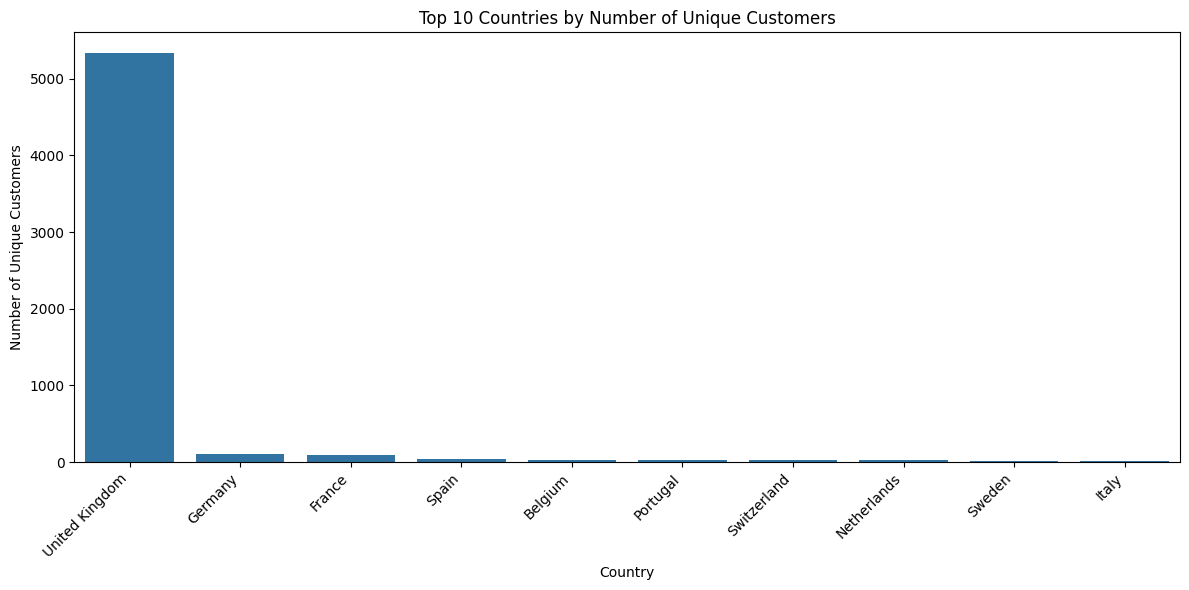

In [ ]:
country_customer_counts = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

top_countries_by_customers = country_customer_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_by_customers.index, y=top_countries_by_customers.values)
plt.title(f'Top {10} Countries by Number of Unique Customers')
plt.xlabel('Country')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4198970796.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_bought.values, y=most_bought.index, palette="Blues_r")


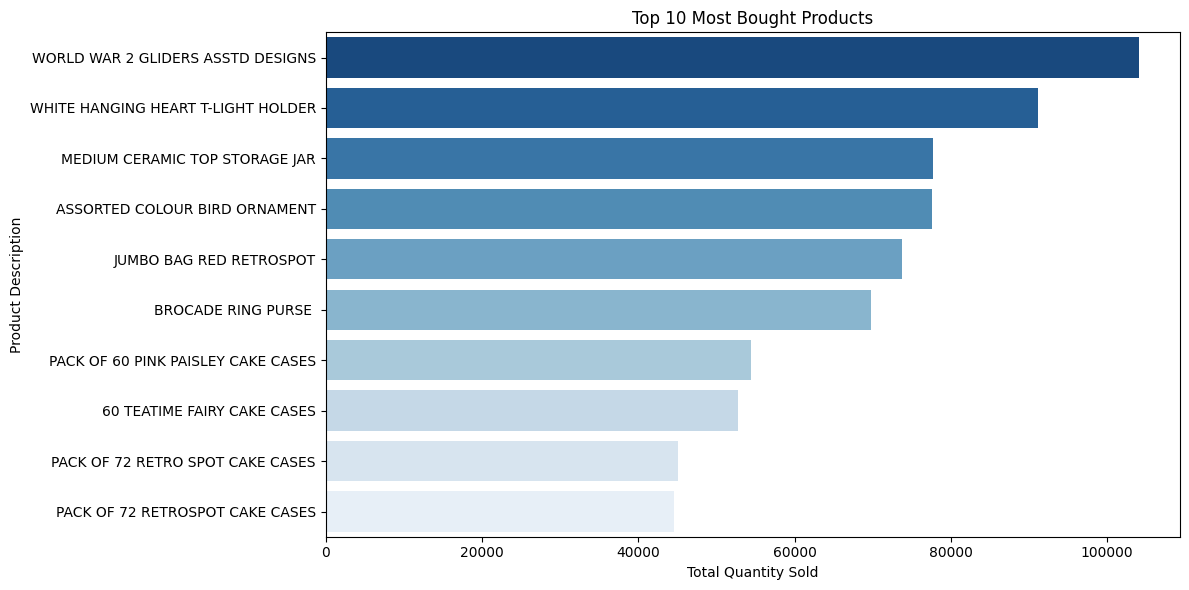

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most bought products
most_bought = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=most_bought.values, y=most_bought.index, palette="Blues_r")
plt.title('Top 10 Most Bought Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

/tmp/ipython-input-841599917.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_expensive.values, y=most_expensive.index, palette="Reds_r")


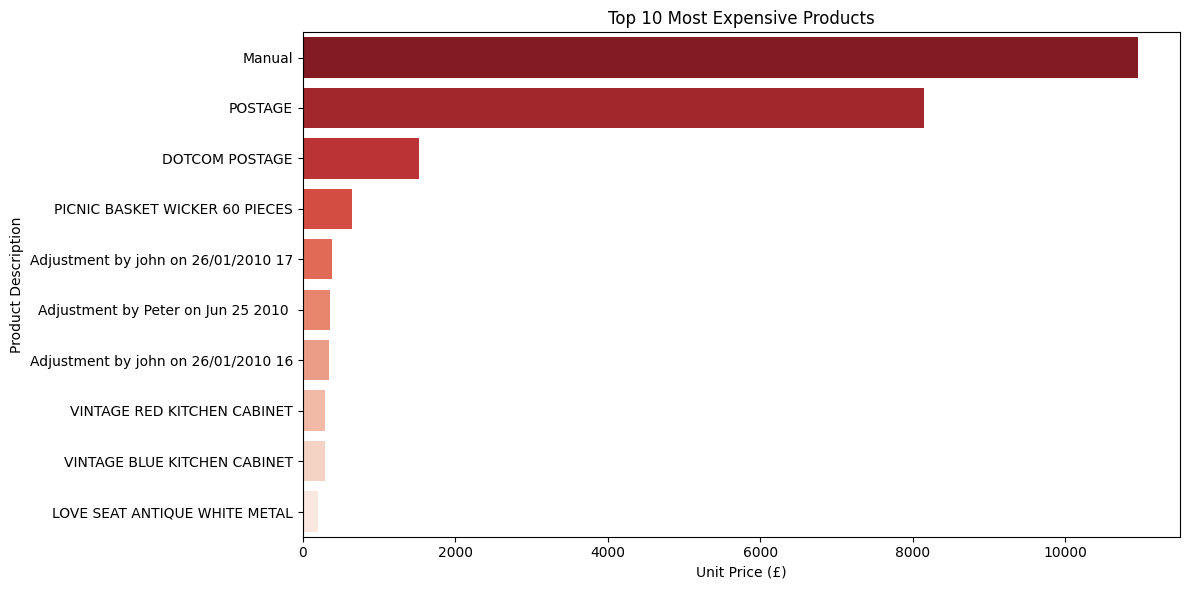

In [ ]:
# Most expensive products
most_expensive = df.groupby('Description')['UnitPrice'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=most_expensive.values, y=most_expensive.index, palette="Reds_r")
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Unit Price (£)')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

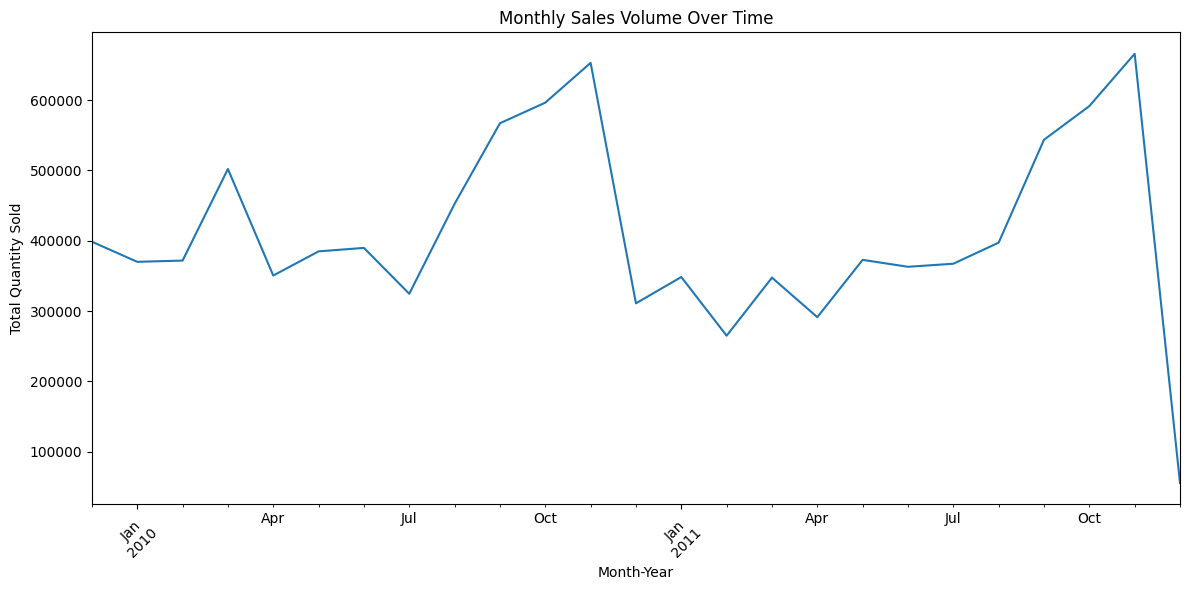

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales_volume = df.groupby('InvoiceYearMonth')['Quantity'].sum()

plt.figure(figsize=(12, 6))
monthly_sales_volume.plot()
plt.title('Monthly Sales Volume Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

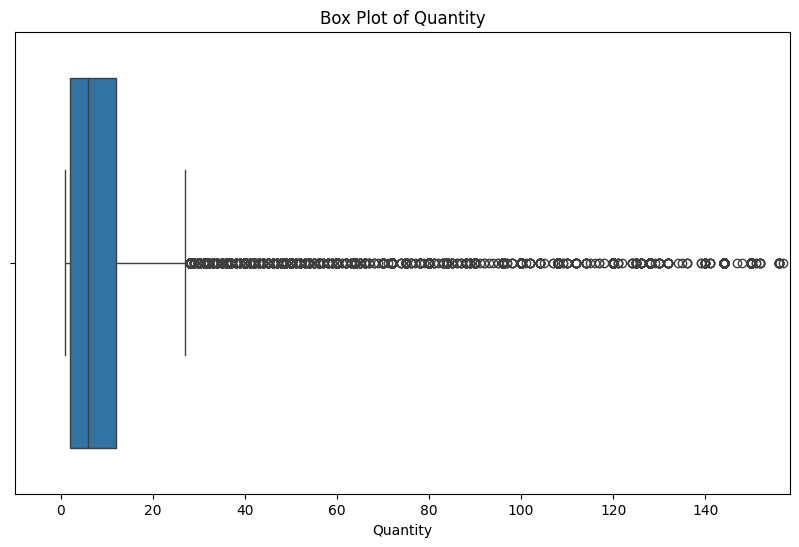

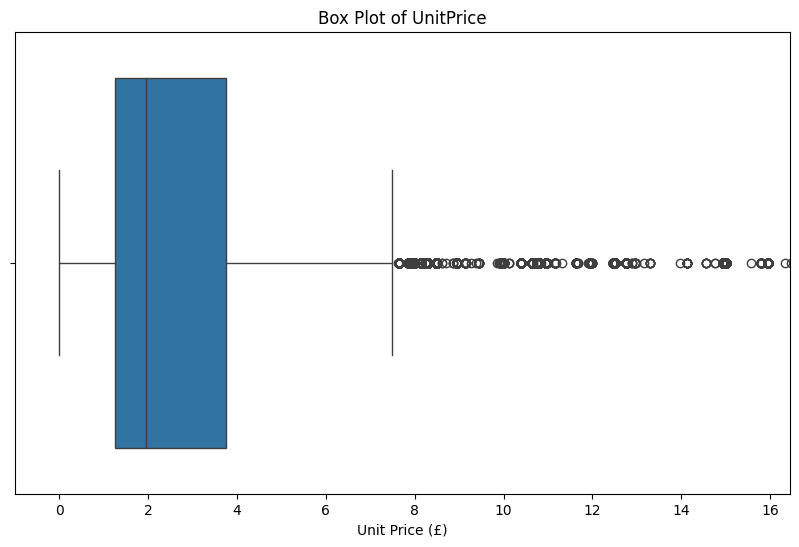

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')
plt.xlim(-10, df['Quantity'].quantile(0.99) * 1.1)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['UnitPrice'])
plt.title('Box Plot of UnitPrice')
plt.xlabel('Unit Price (£)')
plt.xlim(-1, df['UnitPrice'].quantile(0.99) * 1.1)
plt.show()

### Dealing with outliers

In [ ]:
def get_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [ ]:
quantity_outliers = get_outliers_iqr(df, 'Quantity')
unitprice_outliers = get_outliers_iqr(df, 'UnitPrice')

print("Quantity Outliers:\n", quantity_outliers[['InvoiceNo', 'Quantity', 'Description']].head(10))
print("\nUnitPrice Outliers:\n", unitprice_outliers[['InvoiceNo', 'UnitPrice', 'Description']].head(10))

Quantity Outliers:
    InvoiceNo  Quantity                          Description
3     489434        48         RECORD FRAME 7" SINGLE SIZE 
54    489438        28              DINOSAURS  WRITING SET 
55    489438        30       SET OF MEADOW  FLOWER STICKERS
56    489438        30       CHARLIE AND LOLA CHARLOTTE BAG
57    489438        30      JUMBO BAG CHARLIE AND LOLA TOYS
58    489438        60                      JUMBO BAG TOYS 
59    489438        32      COUNTRY COTTAGE  DOORSTOP GREEN
60    489438        32          GINGHAM HEART  DOORSTOP RED
61    489438        56   CHARLIE+LOLA RED HOT WATER BOTTLE 
62    489438        56  CHARLIE LOLA BLUE HOT WATER BOTTLE 

UnitPrice Outliers:
     InvoiceNo  UnitPrice                  Description
22     489436       8.50       BLACK DINER WALL CLOCK
35     489437       9.95       JOY LARGE WOOD LETTERS
38     489437       8.95  WOODEN BOX ADVENT CALENDAR 
88     489439       7.95   ASSORTED COLOUR MINI CASES
89     489439      18.00    

In [ ]:
# Most extreme Quantity
max_quantity_row = df.loc[df['Quantity'].idxmax()]
min_quantity_row = df.loc[df['Quantity'].idxmin()]
print("Max Quantity:\n", max_quantity_row)
print("\nMin Quantity:\n", min_quantity_row)

# Most extreme UnitPrice
max_price_row = df.loc[df['UnitPrice'].idxmax()]
min_price_row = df.loc[df['UnitPrice'].idxmin()]
print("\nMax UnitPrice:\n", max_price_row)
print("\nMin UnitPrice:\n", min_price_row)

Max Quantity:
 InvoiceNo                                   541431
StockCode                                    23166
Description         MEDIUM CERAMIC TOP STORAGE JAR
Quantity                                     74215
InvoiceDate                    2011-01-18 10:01:00
UnitPrice                                     1.04
CustomerID                                 12346.0
Country                             United Kingdom
InvoiceYearMonth                           2011-01
Name: 587080, dtype: object

Min Quantity:
 InvoiceNo                           489437
StockCode                            21360
Description         JOY LARGE WOOD LETTERS
Quantity                                 1
InvoiceDate            2009-12-01 09:08:00
UnitPrice                             9.95
CustomerID                         15362.0
Country                     United Kingdom
InvoiceYearMonth                   2009-12
Name: 35, dtype: object

Max UnitPrice:
 InvoiceNo                        502263
StockCode     

In [ ]:
low_price_count = df[df['UnitPrice'] < 0.1].shape[0]
print(f"Number of rows with UnitPrice < $0.1: {low_price_count}")

Number of rows with UnitPrice < $0.1: 350


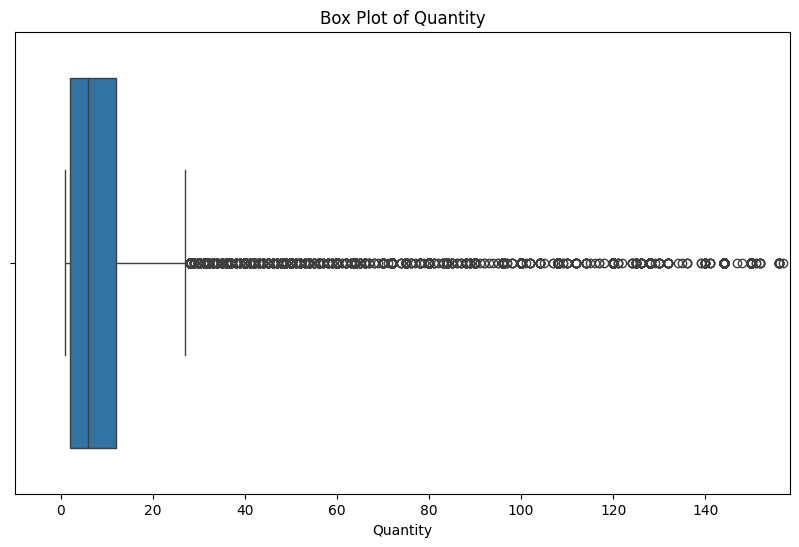

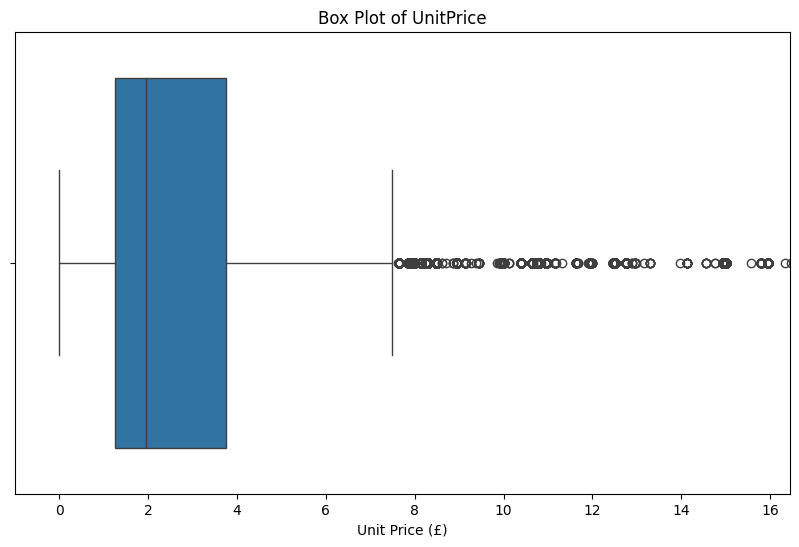

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')
plt.xlim(-10, df['Quantity'].quantile(0.99) * 1.1)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['UnitPrice'])
plt.title('Box Plot of UnitPrice')
plt.xlabel('Unit Price (£)')
plt.xlim(-1, df['UnitPrice'].quantile(0.99) * 1.1)
plt.show()

In [ ]:
df[df['UnitPrice'] < 0.1]['Description'].value_counts().head(10)

,count
Description,
POPART WOODEN PENCILS ASST,64
CARTOON PENCIL SHARPENERS,41
JACOBS LADDER SMALL,38
HOUSE SHAPE PENCIL SHARPENER,37
LETTER SHAPE PENCIL SHARPENER,27
BLUE STONES ON WIRE FOR CANDLE,27
PIECE OF CAMO STATIONERY SET,27
PADS TO MATCH ALL CUSHIONS,17
Manual,11


In [ ]:
import pandas as pd
import datetime as dt

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

ref_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency
    'TotalPrice': 'sum'                                  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
print(rfm.index)

RangeIndex(start=0, stop=5860, step=1)


In [ ]:
# Save RFM dataset to CSV
rfm.to_csv("rfm_dataset.csv", index=False)

# Save RFM dataset to JSON
rfm.to_json("rfm_dataset.json", orient="records", lines=True)

We try to see if adding more features related to rfm can help in clsutering

In [ ]:
# Average Order Value (AOV) - Monetary / Frequency
rfm_trial['AOV'] = rfm_trial['Monetary'] / rfm_trial['Frequency']

# Keep Recency and create RLP as a copy
rfm_trial['RLP'] = rfm_trial['Recency']

# Ensure InvoiceDate in original df is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate first and last purchase dates per customer
first_purchase = df.groupby('CustomerID')['InvoiceDate'].min()
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max()

# Calculate customer lifespan in days
customer_lifespan_series = (last_purchase - first_purchase).dt.days

# Make sure CustomerID types match for mapping
rfm_trial['CustomerID'] = rfm_trial['CustomerID'].astype(customer_lifespan_series.index.dtype)

# Map CustomerLifespan to rfm
rfm_trial['CustomerLifespan'] = rfm_trial['CustomerID'].map(customer_lifespan_series)

# Fill any missing lifespan values (if any) with 0 or a small number
rfm_trial['CustomerLifespan'] = rfm_trial['CustomerLifespan'].fillna(0)

# Calculate Customer Lifetime Value (CLV)
rfm_trial['CLV'] = rfm_trial['AOV'] * rfm_trial['Frequency'] * rfm_trial['CustomerLifespan']


NameError: name 'rfm_trial' is not defined

but actaully it didn't help it jsut messed the clusters up even after applying many techniques such as PCA

In [ ]:
rfm.head()

Now we will visualize the rfm data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Histograms
sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Frequency Distribution')

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2, 0], color='salmon')
axes[2, 0].set_title('Monetary Distribution')

# Boxplots
sns.boxplot(x=rfm['Recency'], ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Recency Boxplot')

sns.boxplot(x=rfm['Frequency'], ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Frequency Boxplot')

sns.boxplot(x=rfm['Monetary'], ax=axes[2, 1], color='salmon')
axes[2, 1].set_title('Monetary Boxplot')


plt.tight_layout()
plt.show()

we are going to see if the extreme values are logical or not

In [ ]:
top_monetary = rfm.sort_values(by='Monetary', ascending=False).head(10)
print(top_monetary)

top_freq = rfm.sort_values(by='Frequency', ascending=False).head(10)
print(top_freq)

low_recency = rfm.sort_values(by='Recency', ascending=False).head(10)
print(low_recency)

In [ ]:
rfm_scaled = rfm[['Recency', 'Frequency', 'Monetary']]

In [ ]:
rfm_scaled = rfm_scaled.apply(np.log1p)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_scaled = scaler.fit_transform(rfm_scaled)

rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

In [ ]:
rfm_scaled.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Histograms
sns.histplot(rfm_scaled['Recency'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Recency Distribution')

sns.histplot(rfm_scaled['Frequency'], bins=30, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Frequency Distribution')

sns.histplot(rfm_scaled['Monetary'], bins=30, kde=True, ax=axes[2, 0], color='salmon')
axes[2, 0].set_title('Monetary Distribution')

# Boxplots
sns.boxplot(x=rfm_scaled['Recency'], ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Recency Boxplot')

sns.boxplot(x=rfm_scaled['Frequency'], ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Frequency Boxplot')

sns.boxplot(x=rfm_scaled['Monetary'], ax=axes[2, 1], color='salmon')
axes[2, 1].set_title('Monetary Boxplot')

plt.tight_layout()
plt.show()


# Segmentation

## Unsupervised Learning Models

finding optimal K

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []          # Sum of Squared Errors (for Elbow Method)
sil_scores = []   # Silhouette Scores
K_range = range(2, 11)  # silhouette_score needs at least 2 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)  # rfm should be numeric-only (no IDs)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Plot both SSE and Silhouette in subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
ax[0].plot(K_range, sse, marker='o')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('SSE (Inertia)')
ax[0].set_title('Elbow Method for Optimal k')
ax[0].grid(True)

# Silhouette Score
ax[1].plot(K_range, sil_scores, marker='o', color='orange')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Score by k')
ax[1].grid(True)

plt.tight_layout()
plt.show()


applying k means clustering

In [ ]:
'''from sklearn.decomposition import PCA

pca = PCA(n_components=3)
rfm_scaled = pca.fit_transform(rfm_scaled[['Recency', 'Frequency', 'Monetary']])'''

In [ ]:
k = 4

# KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for clarity
rfm_scaled['Cluster_kmeans'] = kmeans.fit_predict(rfm_scaled[['Recency', 'Frequency','Monetary']])

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=k)
rfm_scaled['Cluster_AGGLO'] = agglo.fit_predict(rfm_scaled[['Recency', 'Frequency','Monetary']])

# Gaussian Mixture
gmm = GaussianMixture(n_components=k, random_state=42)
rfm_scaled['Cluster_GMM'] = gmm.fit_predict(rfm_scaled[['Recency', 'Frequency','Monetary']])

# Spectral Clustering
spectral = SpectralClustering(n_clusters=k, assign_labels='kmeans', random_state=42)
rfm_scaled['Cluster_SPECTRAL'] = spectral.fit_predict(rfm_scaled[['Recency', 'Frequency','Monetary']])

# Birch Clustering
birch = Birch(n_clusters=k)
rfm_scaled['Cluster_BIRCH'] = birch.fit_predict(rfm_scaled[['Recency', 'Frequency','Monetary']])

In [ ]:
cluster_columns = {
    'KMeans': 'Cluster_kmeans',
    'Agglomerative': 'Cluster_AGGLO',
    'GMM': 'Cluster_GMM',
    'Spectral': 'Cluster_SPECTRAL',
    'Birch': 'Cluster_BIRCH'
}

for name, col in cluster_columns.items():
    sns.pairplot(rfm_scaled, hue=col, vars=['Recency', 'Frequency', 'Monetary'], palette='Set2')
    plt.suptitle(f'{name} Clustering - Pairwise Plots (Scaled RFM)', y=1.02)
    plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

cluster_columns = ['Cluster_kmeans', 'Cluster_AGGLO', 'Cluster_GMM', 'Cluster_SPECTRAL', 'Cluster_BIRCH']

# Compare all pairs of clusterings
for i in range(len(cluster_columns)):
    for j in range(i + 1, len(cluster_columns)):
        col1 = cluster_columns[i]
        col2 = cluster_columns[j]
        ari = adjusted_rand_score(rfm_scaled[col1], rfm_scaled[col2])
        nmi = normalized_mutual_info_score(rfm_scaled[col1], rfm_scaled[col2])
        print(f"ARI between {col1} and {col2}: {ari:.4f} | NMI: {nmi:.4f}")

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled.drop(columns=cluster_columns))

rfm_viz = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'])
rfm_viz = pd.concat([rfm_viz, rfm_scaled[cluster_columns]], axis=1)

for col in cluster_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='PC1', y='PC2', hue=col, data=rfm_viz, palette='tab10')
    plt.title(f'PCA View of {col}')
    plt.show()

In [ ]:
rfm_scaled['Cluster'] = kmeans.labels_
cluster_summary = rfm_scaled.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_summary)

In [ ]:
from sklearn.metrics import silhouette_score

print("Silhouette Score (KMeans, PCA):", silhouette_score(rfm_pca, rfm_scaled['Cluster_kmeans']))
print("Silhouette Score (Agglo, PCA):", silhouette_score(rfm_pca, rfm_scaled['Cluster_AGGLO']))
print("Silhouette Score (GMM, PCA):", silhouette_score(rfm_pca, rfm_scaled['Cluster_GMM']))
print("Silhouette Score (Spectral, PCA):", silhouette_score(rfm_pca, rfm_scaled['Cluster_SPECTRAL']))
print("Silhouette Score (Birch, PCA):", silhouette_score(rfm_pca, rfm_scaled['Cluster_BIRCH']))

In [ ]:
from sklearn.metrics import davies_bouldin_score

print("Davies-Bouldin Score (KMeans, PCA):", davies_bouldin_score(rfm_pca, rfm_scaled['Cluster_kmeans']))
print("Davies-Bouldin Score (Agglo, PCA):", davies_bouldin_score(rfm_pca, rfm_scaled['Cluster_AGGLO']))
print("Davies-Bouldin Score (GMM, PCA):", davies_bouldin_score(rfm_pca, rfm_scaled['Cluster_GMM']))
print("Davies-Bouldin Score (Spectral, PCA):", davies_bouldin_score(rfm_pca, rfm_scaled['Cluster_SPECTRAL']))
print("Davies-Bouldin Score (Birch, PCA):", davies_bouldin_score(rfm_pca, rfm_scaled['Cluster_BIRCH']))

In [ ]:
from sklearn.metrics import calinski_harabasz_score

print("Calinski-Harabasz Score (KMeans, PCA):", calinski_harabasz_score(rfm_pca, rfm_scaled['Cluster_kmeans']))
print("Calinski-Harabasz Score (Agglo, PCA):", calinski_harabasz_score(rfm_pca, rfm_scaled['Cluster_AGGLO']))
print("Calinski-Harabasz Score (GMM, PCA):", calinski_harabasz_score(rfm_pca, rfm_scaled['Cluster_GMM']))
print("Calinski-Harabasz Score (Spectral, PCA):", calinski_harabasz_score(rfm_pca, rfm_scaled['Cluster_SPECTRAL']))
print("Calinski-Harabasz Score (Birch, PCA):", calinski_harabasz_score(rfm_pca, rfm_scaled['Cluster_BIRCH']))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 🧊 3D Plot: Recency, Frequency, Monetary
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    rfm_scaled['Recency'],
    rfm_scaled['Frequency'],
    rfm_scaled['Monetary'],
    c=rfm_scaled['Cluster_kmeans'],  # Changed from 'Cluster_kmeans' to 'Cluster'
    cmap='Set2',
    s=60
)
ax.set_title('Customer Segments (3D View)')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

## DBSCAN

In [ ]:
x = rfm[['Recency', 'Frequency', 'Monetary']]

In [ ]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

nbrs = NearestNeighbors(n_neighbors=5).fit(x)
distances, _ = nbrs.kneighbors(x)
dist = np.sort(distances[:, 4])

# Plot and detect elbow
plt.plot(dist)
plt.xlabel("Points sorted")
plt.ylabel("Distance to 5th NN")
plt.show()

kneedle = KneeLocator(range(len(dist)), dist, curve="concave", direction="increasing")
eps = dist[kneedle.knee]
print("Estimated eps:", eps)

# Tuning min_samples
best_score = -1
best_min = None
for m in range(3, 15):
    y = DBSCAN(eps=eps, min_samples=m).fit_predict(x)
    if len(set(y)) > 1:
        score = silhouette_score(x, y)
        if score > best_score:
            best_score, best_min = score, m

print("Best min_samples:", best_min, "with silhouette:", best_score)

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

db = DBSCAN(eps=3.197, min_samples=5).fit(x)
rfm_scaled['Cluster_DBSCAN'] = db.labels_

sns.pairplot(rfm_scaled, hue='Cluster_DBSCAN', vars=['Recency', 'Frequency', 'Monetary'])
plt.show()


as we can see DBSCAN seems not to be a good fit for this analysis

In [ ]:
cluster_names = {
    0: "Steady Customers",      #Moderate frequency and spending
    1: "Engaged Loyalists",     #Recent, frequent, and high spending
    2: "Occasional Shoppers",   #Low frequency and spending
    3: "At-Risk Customers"      #Older recency, low activity
}
rfm['Cluster_kmeans'] = rfm_scaled['Cluster_kmeans']
rfm['Cluster_Name'] = rfm['Cluster_kmeans'].map(cluster_names)
rfm_scaled['Cluster_Name'] = rfm_scaled['Cluster_kmeans'].map(cluster_names)
rfm.head()

# Understand the Segments

In [ ]:
#Group by cluster and get mean values of features to understand segments
segment_profile = rfm.groupby('Cluster_Name').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
}).round(2)

print(segment_profile)

In [ ]:
segment_products = df.merge(rfm[['CustomerID', 'Cluster_Name']], on='CustomerID')
top_products = segment_products.groupby(['Cluster_Name', 'Description']).size().reset_index(name='counts')

#see top 5 items per segment
top_products.groupby('Cluster_Name').apply(lambda x: x.sort_values('counts', ascending=False).head(5))

In [ ]:
# Melt the scaled RFM data with cluster assignments for easier plotting
rfm_scaled_melted = rfm_scaled.melt(
    id_vars=['Cluster_kmeans', 'Cluster_Name'],
    value_vars=['Recency', 'Frequency', 'Monetary'],
    var_name='Metric',
    value_name='Value'
)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster_Name', y='Value', hue='Metric', data=rfm_scaled_melted, palette='Set2')
plt.title('Distribution of Scaled RFM Metrics by Cluster')
plt.xlabel('Customer Segment')
plt.ylabel('Scaled Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean RFM values for each cluster
cluster_avg_rfm = rfm.groupby('Cluster_Name')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Melt the cluster average RFM data for easier plotting
cluster_avg_rfm_melted = cluster_avg_rfm.melt(
    id_vars='Cluster_Name',
    value_vars=['Recency', 'Frequency', 'Monetary'],
    var_name='Metric',
    value_name='Average_Value'
)

plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster_Name', y='Average_Value', hue='Metric', data=cluster_avg_rfm_melted, palette='viridis')
plt.title('Average RFM Values by Cluster')
plt.xlabel('Customer Segment')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Identify coupon transactions

In [ ]:
# Identify rows that might represent coupon usage based on StockCode and Description
coupon_keywords = ['POSTAGE', 'DOTCOM POSTAGE', 'Manual', 'PADS', 'D']
df_coupons = df[df['StockCode'].isin(coupon_keywords)]

# Display the first few rows of the identified coupon transactions
display(df_coupons.head())

## Analyze coupon usage over time

In [ ]:
# Ensure 'InvoiceDate' is datetime
df_coupons['InvoiceDate'] = pd.to_datetime(df_coupons['InvoiceDate'])

# Extract month and year for grouping
df_coupons['InvoiceYearMonth'] = df_coupons['InvoiceDate'].dt.to_period('M')

# Group by month and year and sum the quantity to see usage over time
monthly_coupon_usage = df_coupons.groupby('InvoiceYearMonth')['Quantity'].sum()

# Plot the monthly coupon usage
plt.figure(figsize=(12, 6))
monthly_coupon_usage.plot()
plt.title('Monthly Coupon Usage Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity of Coupons Used')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Identify coupon usage by cluster

In [ ]:
# Merge the coupon data with the cluster assignments
coupon_by_cluster = df_coupons.merge(rfm[['CustomerID', 'Cluster_Name']], on='CustomerID', how='left')

coupon_by_cluster.dropna(subset=['Cluster_Name'], inplace=True)

# Group by cluster and count the number of coupon transactions
coupon_counts_by_cluster = coupon_by_cluster.groupby('Cluster_Name').size().reset_index(name='coupon_transactions')

print(coupon_counts_by_cluster)

# Visualize the coupon usage by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster_Name', y='coupon_transactions', data=coupon_counts_by_cluster, palette='viridis')
plt.title('Number of Coupon Transactions by Customer Cluster')
plt.xlabel('Customer Cluster')
plt.ylabel('Number of Coupon Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Calculate coupon transaction proportion by cluster

In [ ]:
# Calculate the total number of transactions per customer
total_transactions_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='total_transactions')

# Calculate the number of coupon transactions per customer
coupon_transactions_per_customer = df_coupons.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='coupon_transactions')

# Merge the total and coupon transaction counts
transaction_summary = total_transactions_per_customer.merge(
    coupon_transactions_per_customer,
    on='CustomerID',
    how='left'
).fillna(0) # Fill NaN coupon counts with 0

# Calculate the proportion of coupon transactions
transaction_summary['coupon_proportion'] = transaction_summary['coupon_transactions'] / transaction_summary['total_transactions']

# Merge with cluster names
transaction_summary = transaction_summary.merge(rfm[['CustomerID', 'Cluster_Name']], on='CustomerID')

# Calculate the average coupon proportion per cluster
average_coupon_proportion_by_cluster = transaction_summary.groupby('Cluster_Name')['coupon_proportion'].mean().reset_index()

# Display the results
print(average_coupon_proportion_by_cluster)

## Visualize coupon usage proportion by cluster

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster_Name', y='coupon_proportion', data=average_coupon_proportion_by_cluster, palette='viridis')
plt.title('Average Proportion of Transactions with Coupons by Customer Cluster')
plt.xlabel('Customer Cluster')
plt.ylabel('Average Proportion of Coupon Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pipeline and Downlaoding the model

In [ ]:
import joblib

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the StandardScaler
joblib.dump(scaler, 'scaler.pkl')

print("KMeans model and scaler saved successfully.")

Now we add the process that will be done at the end of each day to re-process the dataset df

In [ ]:
'''# Drop missing customers
df = df.dropna(subset=['CustomerID'])

# Standardize product descriptions (fix duplicates/missing)
desc_map = df.dropna(subset=["Description"]).groupby("StockCode")["Description"] \
             .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df["Description"] = df.apply(
    lambda row: desc_map[row["StockCode"]] if pd.isna(row["Description"]) and row["StockCode"] in desc_map else row["Description"],
    axis=1
)

# Remove invalid transactions
print("Initial Length of df: ", len(df))
df = df[df['Quantity'] > 0]                              # No negative qty
df = df[~df['InvoiceNo'].str.startswith('C')]            # Remove cancellations
df = df[df['UnitPrice'] > 0]                             # No free/negative prices
df = df.drop_duplicates()
print('Final Length of df: ', len(df))
'''

In [ ]:
'''import datetime as dt

# Total spend per row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Reference date = day after last invoice
ref_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency (# unique invoices)
    'TotalPrice': 'sum'                                  # Monetary (total spend)
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']'''

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import joblib

def process_and_cluster(df, scaler_path="scaler.pkl", kmeans_path="kmeans.pkl"):
    """
    Cleans Online Retail dataset, creates RFM features,
    scales them using a pre-trained scaler, and assigns clusters
    using a pre-trained KMeans model.

    Parameters
    ----------
    df : pd.DataFrame
        Raw Online Retail dataset.
    scaler_path : str
        Path to saved StandardScaler .pkl file.
    kmeans_path : str
        Path to saved KMeans .pkl file.

    Returns
    -------
    rfm : pd.DataFrame
        RFM dataset with assigned clusters.
    """

    # ---------------------------
    # 1. CLEANING
    # ---------------------------
    df = df.dropna(subset=['CustomerID'])

    # Standardize item descriptions across StockCodes
    desc_map = (
        df.dropna(subset=["Description"])
        .groupby("StockCode")["Description"]
        .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    )
    df["Description"] = df.apply(
        lambda row: desc_map[row["StockCode"]]
        if pd.isna(row["Description"]) and row["StockCode"] in desc_map
        else row["Description"],
        axis=1
    )

    df = df[df['Quantity'] > 0]
    df = df[~df['InvoiceNo'].str.startswith('C')]
    df = df[df['UnitPrice'] > 0]
    df = df.drop_duplicates()

    # ---------------------------
    # 2. CREATE RFM FEATURES
    # ---------------------------
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
    ref_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
        'InvoiceNo': 'nunique',                              # Frequency
        'TotalPrice': 'sum'                                  # Monetary
    }).reset_index()

    rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

    # Log-transform
    rfm_transformed = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)

    # ---------------------------
    # 3. LOAD PRE-TRAINED SCALER AND K-MEANS
    # ---------------------------
    scaler = joblib.load(scaler_path)
    kmeans = joblib.load(kmeans_path)

    rfm_scaled = scaler.transform(rfm_transformed)

    # Assign clusters
    rfm['Cluster'] = kmeans.predict(rfm_scaled)

    return rfm

In [ ]:
# Run pipeline
rfm_clusters, pipeline = process_and_cluster(df, n_clusters=4)

print(rfm_clusters.head())

In [ ]:
!pip install streamlit
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Load models
scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans_model.pkl")

# Segment mapping
cluster_names = {
    0: "Steady Customers",
    1: "Engaged Loyalists",
    2: "Occasional Shoppers",
    3: "At-Risk Customers"
}

st.title("🛍 Real-Life Customer Segmentation Dashboard")
st.write("Upload a raw retail dataset (must contain **InvoiceNo, CustomerID, Quantity, UnitPrice, InvoiceDate**).")

# File uploader
uploaded_file = st.file_uploader("Upload CSV", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file, encoding="ISO-8859-1")

    # ---- Data Cleaning ----
    st.write("### Data Cleaning in Progress...")
    df.dropna(subset=["CustomerID"], inplace=True)
    df = df[df["Quantity"] > 0]
    df = df[df["UnitPrice"] > 0]
    df.drop_duplicates(inplace=True)

    # ---- Feature Engineering ----
    df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
    df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

    # Define snapshot date (one day after max date)
    snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

    # ---- RFM Calculation ----
    rfm = df.groupby("CustomerID").agg({
        "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
        "InvoiceNo": "count",
        "TotalPrice": "sum"
    })

    rfm.columns = ["Recency", "Frequency", "Monetary"]

    # ---- Scaling & Clustering ----
    X_scaled = scaler.transform(rfm[["Recency", "Frequency", "Monetary"]])
    rfm["Cluster"] = kmeans.predict(X_scaled)
    rfm["Segment"] = rfm["Cluster"].map(cluster_names)

    st.success("✅ Data processed and segmented successfully!")

    # ---- Show Sample ----
    st.write("### Segmented Customers (sample)")
    st.dataframe(rfm.head(10))

    # Download segmented dataset
    csv_download = rfm.reset_index().to_csv(index=False).encode("utf-8")
    st.download_button(
        "📥 Download Segmented Customers",
        csv_download,
        "segmented_customers.csv",
        "text/csv"
    )

    # ---- Visualizations ----
    st.write("### Segment Distribution")
    fig1, ax1 = plt.subplots()
    rfm["Segment"].value_counts().plot(kind="bar", ax=ax1)
    ax1.set_ylabel("Number of Customers")
    st.pyplot(fig1)

    st.write("### Average RFM by Segment")
    avg_rfm = rfm.groupby("Segment")[["Recency", "Frequency", "Monetary"]].mean()
    fig2, ax2 = plt.subplots()
    avg_rfm.plot(kind="bar", ax=ax2)
    st.pyplot(fig2)
